<a href="https://colab.research.google.com/github/Deepak4053/Image_Style_Transfer/blob/main/using_vgg19and_grammetrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import matplotlib.pyplot as plt


In [ ]:
#  Pretrained VGG19 Model for Feature Extraction
def load_vgg19_model(layer_names):
    vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=False)
    vgg19.trainable = False
    layers = [vgg19.get_layer(name).output for name in layer_names]
    return tf.keras.Model(inputs=vgg19.input, outputs=layers)

In [ ]:
# preprocess of image
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

In [ ]:
def load_images(image_paths):
    return [preprocess_image(img_path) for img_path in image_paths]

In [ ]:
#gram metrix defined
def gram_matrix(feature_map):
    shape = tf.shape(feature_map)
    height, width, channels = shape[1], shape[2], shape[3]
    feature_map = tf.reshape(feature_map, (height * width, channels))
    gram = tf.matmul(feature_map, feature_map, transpose_a=True)
    return gram / tf.cast(height * width * channels, tf.float32)

In [ ]:
def extract_features_and_gram(image, feature_extractor):
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    feature_maps = feature_extractor(image)
    gram_matrices = [gram_matrix(fmap) for fmap in feature_maps]
    return feature_maps, gram_matrices

In [ ]:
import matplotlib.pyplot as plt

# plot feature maps
def plot_feature_maps(feature_maps, layer_names):
    num_layers = len(layer_names)
    plt.figure(figsize=(20, 10))
    for i, fmap in enumerate(feature_maps):
        plt.subplot(1, num_layers, i + 1)
        plt.imshow(tf.reduce_mean(fmap[0], axis=-1), cmap="viridis")
        plt.title(f"FMap-{layer_names[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()




In [ ]:
# plot Gram matrices
def plot_gram_matrices(gram_matrices, layer_names):
    num_layers = len(layer_names)
    plt.figure(figsize=(20, 10))
    for i, gram in enumerate(gram_matrices):
        plt.subplot(1, num_layers, i + 1)
        plt.imshow(gram, cmap="viridis")
        plt.title(f"GMet-{layer_names[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


Saving contentimage2.jpg to contentimage2 (6).jpg


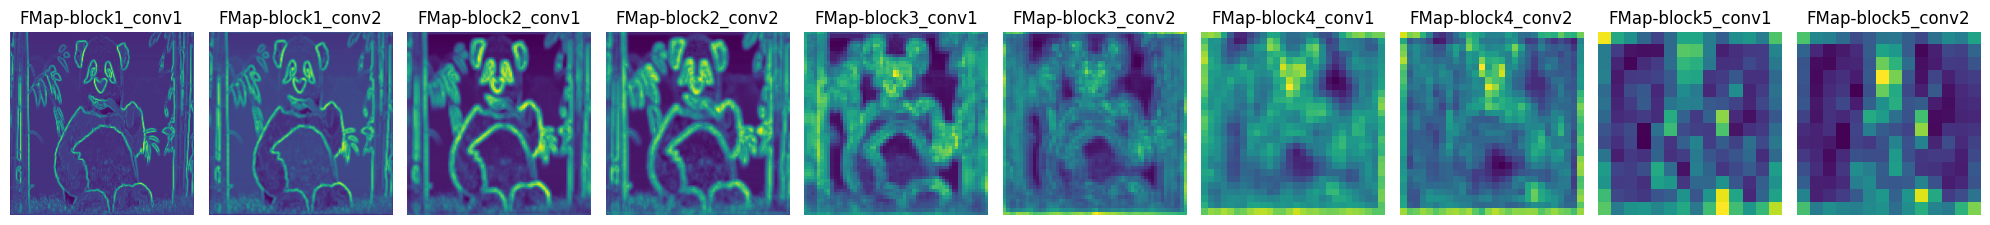

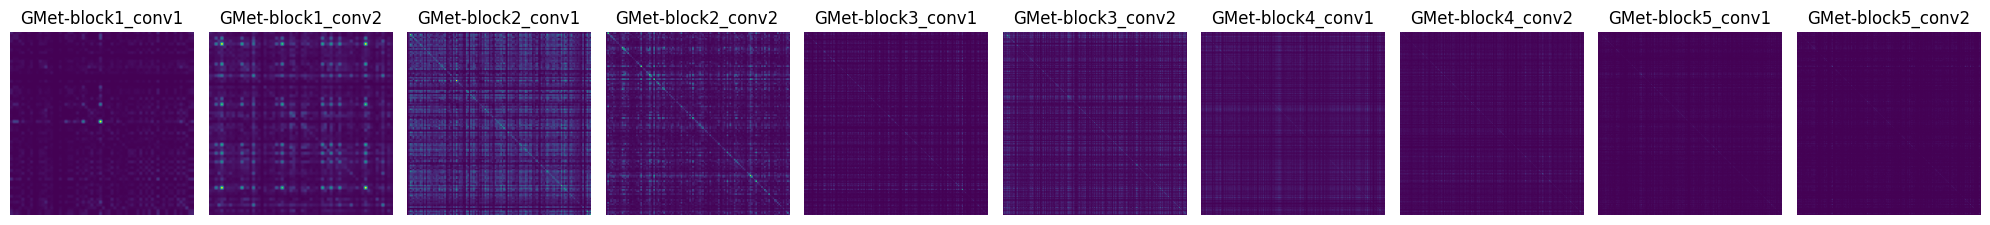

In [ ]:
from google.colab import files
uploaded = files.upload()
image_paths = list(uploaded.keys())

if __name__ == "__main__":
    layer_names = [
        'block1_conv1', 'block1_conv2',
        'block2_conv1', 'block2_conv2',
        'block3_conv1', 'block3_conv2',
        'block4_conv1', 'block4_conv2',
        'block5_conv1', 'block5_conv2']
    feature_extractor = load_vgg19_model(layer_names)
    image_paths = list(uploaded.keys())
    images = load_images(image_paths)
    # Process each image
    for img in images:
        feature_maps, gram_matrices = extract_features_and_gram(img, feature_extractor)
        plot_feature_maps(feature_maps, layer_names)
        plot_gram_matrices(gram_matrices, layer_names)
